In [2]:
# Image Pyramids
# 이미지의 스케일과 해상도를 조절하는 작업
# 전체 이미지에서 특정 이미지를 찾을 때 해상도를 다단계로 만들어 탐색
# 동일한 이미지를 해상도와 스케일에 따라 나눈 이미지 세트를 이미지 피라미드라한다.
# 상위 단계로 갈수록 해상도는 작고 스케일이 높다.

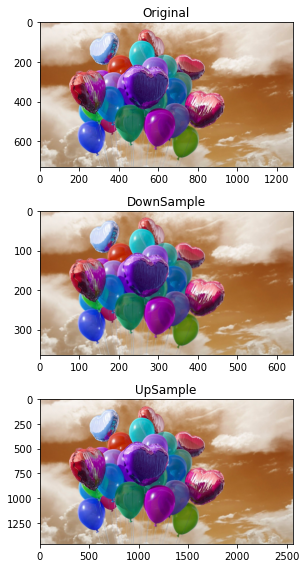

In [7]:
# 1. Gaussian Pyramids
# 가우시안 피라미드는 크기 조절시 Gaussian Filter를 사용한다
# downsampling : 상위 단계 이미지 생성 . 이미지를 가우시안 블러처리 후 짝수 행과 열을 제거
# 헤상도 M*N 에서 M/2 * N/2 가 되어 1/4 크기가 된다.(Octave)
# upsampling : 하위 단계 이미지 생성. 상위 단계의 이미지에서 짝수 열과 행에 픽셀을 추가후 이미지를 블러처리하여 만든다.
# cv2.pyrDown(src[,dst[,dstsize[,borderType]]]) -> dst
# pyrDown은 Downsample 하기 전에 5X5 가우시안 필터를 적용하여 블러 처리한다.
# dstsize : 출력 이미지 크기. 기본적으로 Octave로 계산된다.
# cv2.pyrUp(src[,dst[,dstsize[,borderType]]]) -> dst
# pyrUp은 Upsample한 후 위의 가우시안 필터같은 커널에 4를 곱하여 Upsamle이미지에 합성곱한다.
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('balloons1.jpg')

img_down = cv2.pyrDown(img)
img_up = cv2.pyrUp(img)

cv2.imshow('img',img)
cv2.imshow('img_down',img_down)
cv2.imshow('img_up',img_up)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ['Original','DownSample','UpSample']
images = [img,img_down,img_up]
plt.figure(figsize=(8,8))
for i in range(len(images)):
    plt.subplot(3,1,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
plt.tight_layout()
plt.show()

(426, 640, 3)
(426, 640, 3)


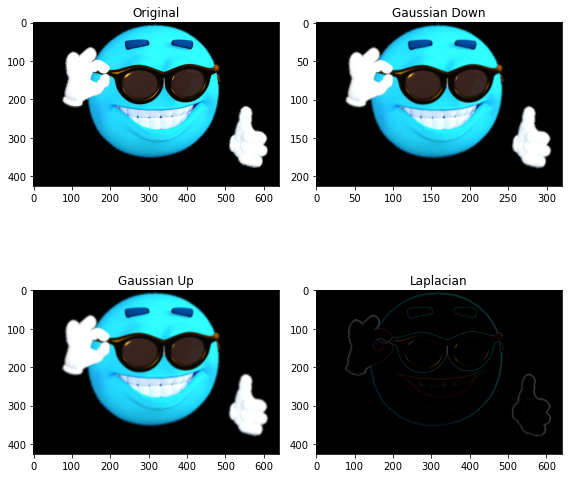

In [18]:
# 2. Laplacian Pyramid
# 가우시안 피라미드로 부터 생성된다.
# 라플라시안 필터는 이미지에서 고주파 통과 필터로
# 피라미드의 각 레벨에서 경계선 이미지를 얻을 수 있다.
# 라플라시안 피라미드의 레벨은 해당 레벨의 가우시안 피라미드 이미지와
# 상위 단계의 이미지를 확장시킨 이미지의 차이로 구성된다.
# 1. 원본 이미지로 상위 단계 생성
# 2. 만들어진 상위 단계에서 하위 단계 생성
# 3. 원본과 2에서 만들어진 이미지 크기를 resize를 통해 맞춘 후 차이를 구한다.
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('emoji1.png')
img_gad = cv2.pyrDown(img)
img_gau = cv2.pyrUp(img_gad)

print(img.shape)
print(img_gau.shape)

img_lap = cv2.subtract(img,img_gau)

cv2.imshow('Original',img)
cv2.imshow('Gaussian Down',img_gad)
cv2.imshow('Gaussian Up',img_gau)
cv2.imshow('Laplacian',img_lap)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ['Original','Gaussian Down','Gaussian Up','Laplacian']
images = [img,img_gad,img_gau,img_lap]
plt.figure(figsize=(8,8))
for i in range(len(images)):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
plt.tight_layout()
plt.show()